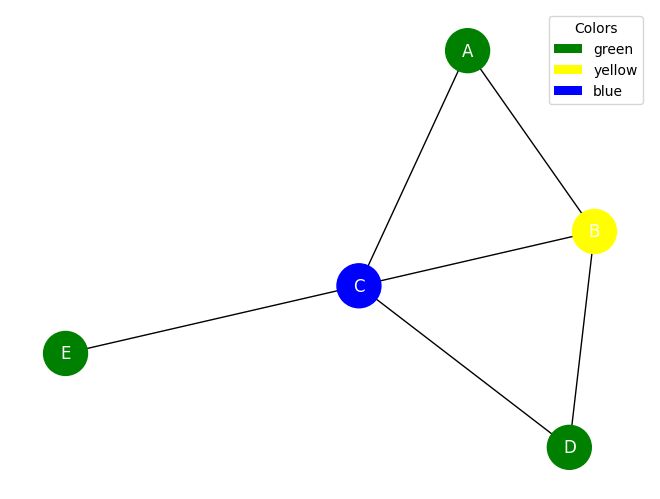

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Define the graph where each node is a region and edges represent borders
G = nx.Graph()

# Add nodes (regions)
regions = ['A', 'B', 'C', 'D', 'E']
G.add_nodes_from(regions)

# Add edges (borders between regions)
edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E')]
G.add_edges_from(edges)

# Define the available colors
colors = ['red', 'green', 'blue', 'yellow']


# Function to assign colors to the nodes (regions) using greedy coloring algorithm
def greedy_coloring(graph, colors):
    color_map = {}
    for node in graph.nodes():
        available_colors = set(colors)  # Start with all colors available
        for neighbor in graph.neighbors(node):
            if neighbor in color_map:
                available_colors.discard(color_map[neighbor])
        color_map[node] = available_colors.pop()  # Assign the first available color
    return color_map

# Get the color map
color_map = greedy_coloring(G, colors)

# Draw the graph with the colors
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, node_color=[color_map[node] for node in G.nodes()], with_labels=True, node_size=1000, font_color='white')

# Create a legend
legend_elements = [Patch(facecolor=color, label=f'{color}') for color in set(color_map.values())]
plt.legend(handles=legend_elements, title="Colors")

# Show the plot
plt.show()